# Breast Cancer Prediction

By Raphaël Roux, Adrien Servas, Romain Requena, Léonard Seidlitz

## Stage 1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [3]:
df = pd.read_csv('Esophageal_Dataset.csv')

### Data Analysis

#### Infos and Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 85 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Unnamed: 0                                                     3985 non-null   int64  
 1   patient_barcode                                                3985 non-null   object 
 2   tissue_source_site                                             3985 non-null   object 
 3   patient_id                                                     3985 non-null   object 
 4   bcr_patient_uuid                                               3985 non-null   object 
 5   informed_consent_verified                                      3985 non-null   object 
 6   icd_o_3_site                                                   3985 non-null   object 
 7   icd_o_3_histology                                           

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3985.0,2006.742785,1150.951742,0.0,1011.0,2007.0,3003.0,3999.0
days_to_birth,3985.0,-23367.341782,4441.493885,-32972.0,-27075.0,-22812.0,-19925.0,-10143.0
height,3766.0,172.128518,9.080075,145.0,166.0,173.0,178.0,202.0
weight,3945.0,75.622560,18.997044,41.0,62.0,72.0,86.0,198.0
days_to_last_followup,2788.0,306.201937,506.175392,-4.0,3.0,105.0,408.0,3714.0
days_to_death,1197.0,467.858814,456.199865,0.0,157.0,283.0,610.0,2134.0
tobacco_smoking_history,3605.0,2.362829,1.142633,1.0,1.0,2.0,3.0,4.0
age_began_smoking_in_years,1732.0,22.212471,7.606050,10.0,16.0,20.0,26.0,57.0
stopped_smoking_year,1608.0,1987.808458,19.210053,1949.0,1971.0,1989.0,2009.0,2013.0
number_pack_years_smoked,2169.0,35.392577,21.614376,1.0,19.0,31.0,50.0,102.0


In [6]:
df.isnull().sum()

Unnamed: 0                                            0
patient_barcode                                       0
tissue_source_site                                    0
patient_id                                            0
bcr_patient_uuid                                      0
                                                   ... 
primary_pathology_residual_tumor                    520
primary_pathology_karnofsky_performance_score      2625
primary_pathology_eastern_cancer_oncology_group    2628
primary_pathology_radiation_therapy                 638
primary_pathology_postoperative_rx_tx               658
Length: 85, dtype: int64

In [7]:
df.head()

,Unnamed: 0,patient_barcode,tissue_source_site,patient_id,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,...,primary_pathology_lymph_node_examined_count,primary_pathology_number_of_lymphnodes_positive_by_he,primary_pathology_number_of_lymphnodes_positive_by_ihc,primary_pathology_planned_surgery_status,primary_pathology_treatment_prior_to_surgery,primary_pathology_residual_tumor,primary_pathology_karnofsky_performance_score,primary_pathology_eastern_cancer_oncology_group,primary_pathology_radiation_therapy,primary_pathology_postoperative_rx_tx
0,0,TCGA-2H-A9GF,2H,A9GF,0500F1A6-A528-43F3-B035-12D3B7C99C0F,YES,C15.5,8140/3,C15.5,NO,...,8.0,7.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
1,1,TCGA-2H-A9GG,2H,A9GG,70084008-697D-442D-8F74-C12F8F598570,YES,C15.5,8140/3,C15.5,NO,...,19.0,4.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
2,2,TCGA-2H-A9GH,2H,A9GH,606DC5B8-7625-42A6-A936-504EF25623A4,YES,C15.5,8140/3,C15.5,NO,...,30.0,1.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
3,3,TCGA-2H-A9GI,2H,A9GI,CEAF98F8-517E-457A-BF29-ACFE22893D49,YES,C15.5,8140/3,C15.5,NO,...,8.0,4.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
4,4,TCGA-2H-A9GJ,2H,A9GJ,EE47CD59-C8D8-4B1E-96DB-91C679E4106F,YES,C15.5,8140/3,C15.5,NO,...,19.0,0.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO


##### Cleaning and Mapping

Last column is null and useless, we are droping it. We don't need id either for prediction.

In [ ]:
#df = df.drop(columns=['patient_barcode', 'patient_barcode'], axis=1)
#df = df.drop(columns=['patient_id', 'patient_id'], axis=1)
#df = df.drop(columns=['bcr_patient_uuid', 'bcr_patient_uuid'], axis=1)
#df = df.drop(columns=['informed_consent_verified', 'informed_consent_verified'], axis=1)
#df = df.drop(columns=['icd_o_3_site', 'icd_o_3_site'], axis=1)
#df = df.drop(columns=['icd_o_3_histology', 'icd_o_3_histology'], axis=1)
df = df.drop(columns=['icd_10', 'icd_10'], axis=1)
df = df.drop(columns=['days_to_birth', 'days_to_birth'], axis=1)
df = df.drop(columns=['country_of_birth', 'country_of_birth'], axis=1)
df = df.drop(columns=['country_of_procurement', 'country_of_procurement'], axis=1)
df = df.drop(columns=['state_province_of_procurement', 'state_province_of_procurement'], axis=1)
df = df.drop(columns=['city_of_procurement', 'city_of_procurement'], axis=1)
df = df.drop(columns=['race_list', 'race_list'], axis=1)
df = df.drop(columns=['ethnicity', 'ethnicity'], axis=1)
df = df.drop(columns=['other_dx', 'other_dx'], axis=1)
df = df.drop(columns=['history_of_neoadjuvant_treatment', 'history_of_neoadjuvant_treatment'], axis=1)
df = df.drop(columns=['day_of_form_completion', 'day_of_form_completion'], axis=1)
df = df.drop(columns=['month_of_form_completion', 'month_of_form_completion'], axis=1)
df = df.drop(columns=['year_of_form_completion', 'year_of_form_completion'], axis=1)
df = df.drop(columns=['has_follow_ups_information', 'has_follow_ups_information'], axis=1)
df = df.drop(columns=['has_drugs_information', 'has_drugs_information'], axis=1)
df = df.drop(columns=['has_radiations_information', 'has_radiations_information'], axis=1)
df = df.drop(columns=['project', 'project'], axis=1)
df = df.drop(columns=['stage_event_system_version', 'stage_event_system_version'], axis=1)
df = df.drop(columns=['stage_event_clinical_stage', 'stage_event_clinical_stage'], axis=1)
df = df.drop(columns=['stage_event_pathologic_stage', 'stage_event_pathologic_stage'], axis=1)
df = df.drop(columns=['stage_event_tnm_categories', 'stage_event_tnm_categories'], axis=1)
df = df.drop(columns=['stage_event_psa', 'stage_event_psa'], axis=1)
df = df.drop(columns=['stage_event_gleason_grading', 'stage_event_gleason_grading'], axis=1)
df = df.drop(columns=['stage_event_ann_arbor', 'stage_event_ann_arbor'], axis=1)
df = df.drop(columns=['stage_event_serum_markers', 'stage_event_serum_markers'], axis=1)
df = df.drop(columns=['stage_event_igcccg_stage', 'stage_event_igcccg_stage'], axis=1)
df = df.drop(columns=['stage_event_masaoka_stage', 'stage_event_masaoka_stage'], axis=1)
df = df.drop(columns=['ethnicity', 'ethnicity'], axis=1)
df = df.drop(columns=['ethnicity', 'ethnicity'], axis=1)
df = df.drop(columns=['ethnicity', 'ethnicity'], axis=1)

KeyError: "['icd_o_3_site', 'icd_o_3_site'] not found in axis"

In [9]:
print(df['primary_pathology_residual_tumor'].value_counts(normalize=True))

primary_pathology_residual_tumor
R0    0.840115
R1    0.086003
RX    0.062338
R2    0.011544
Name: proportion, dtype: float64


Mapping of the column we will predict : Malign (M) = 1, Begnign (B) = 0

In [10]:
df['primary_pathology_residual_tumor'] = df['primary_pathology_residual_tumor'].map({'M': 1, 'B': 0})

In [11]:
df.head()

,Unnamed: 0,patient_barcode,tissue_source_site,patient_id,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,...,primary_pathology_lymph_node_examined_count,primary_pathology_number_of_lymphnodes_positive_by_he,primary_pathology_number_of_lymphnodes_positive_by_ihc,primary_pathology_planned_surgery_status,primary_pathology_treatment_prior_to_surgery,primary_pathology_residual_tumor,primary_pathology_karnofsky_performance_score,primary_pathology_eastern_cancer_oncology_group,primary_pathology_radiation_therapy,primary_pathology_postoperative_rx_tx
0,0,TCGA-2H-A9GF,2H,A9GF,0500F1A6-A528-43F3-B035-12D3B7C99C0F,YES,C15.5,8140/3,C15.5,NO,...,8.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO
1,1,TCGA-2H-A9GG,2H,A9GG,70084008-697D-442D-8F74-C12F8F598570,YES,C15.5,8140/3,C15.5,NO,...,19.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO
2,2,TCGA-2H-A9GH,2H,A9GH,606DC5B8-7625-42A6-A936-504EF25623A4,YES,C15.5,8140/3,C15.5,NO,...,30.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO
3,3,TCGA-2H-A9GI,2H,A9GI,CEAF98F8-517E-457A-BF29-ACFE22893D49,YES,C15.5,8140/3,C15.5,NO,...,8.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO
4,4,TCGA-2H-A9GJ,2H,A9GJ,EE47CD59-C8D8-4B1E-96DB-91C679E4106F,YES,C15.5,8140/3,C15.5,NO,...,19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO


##### Feature Distribution

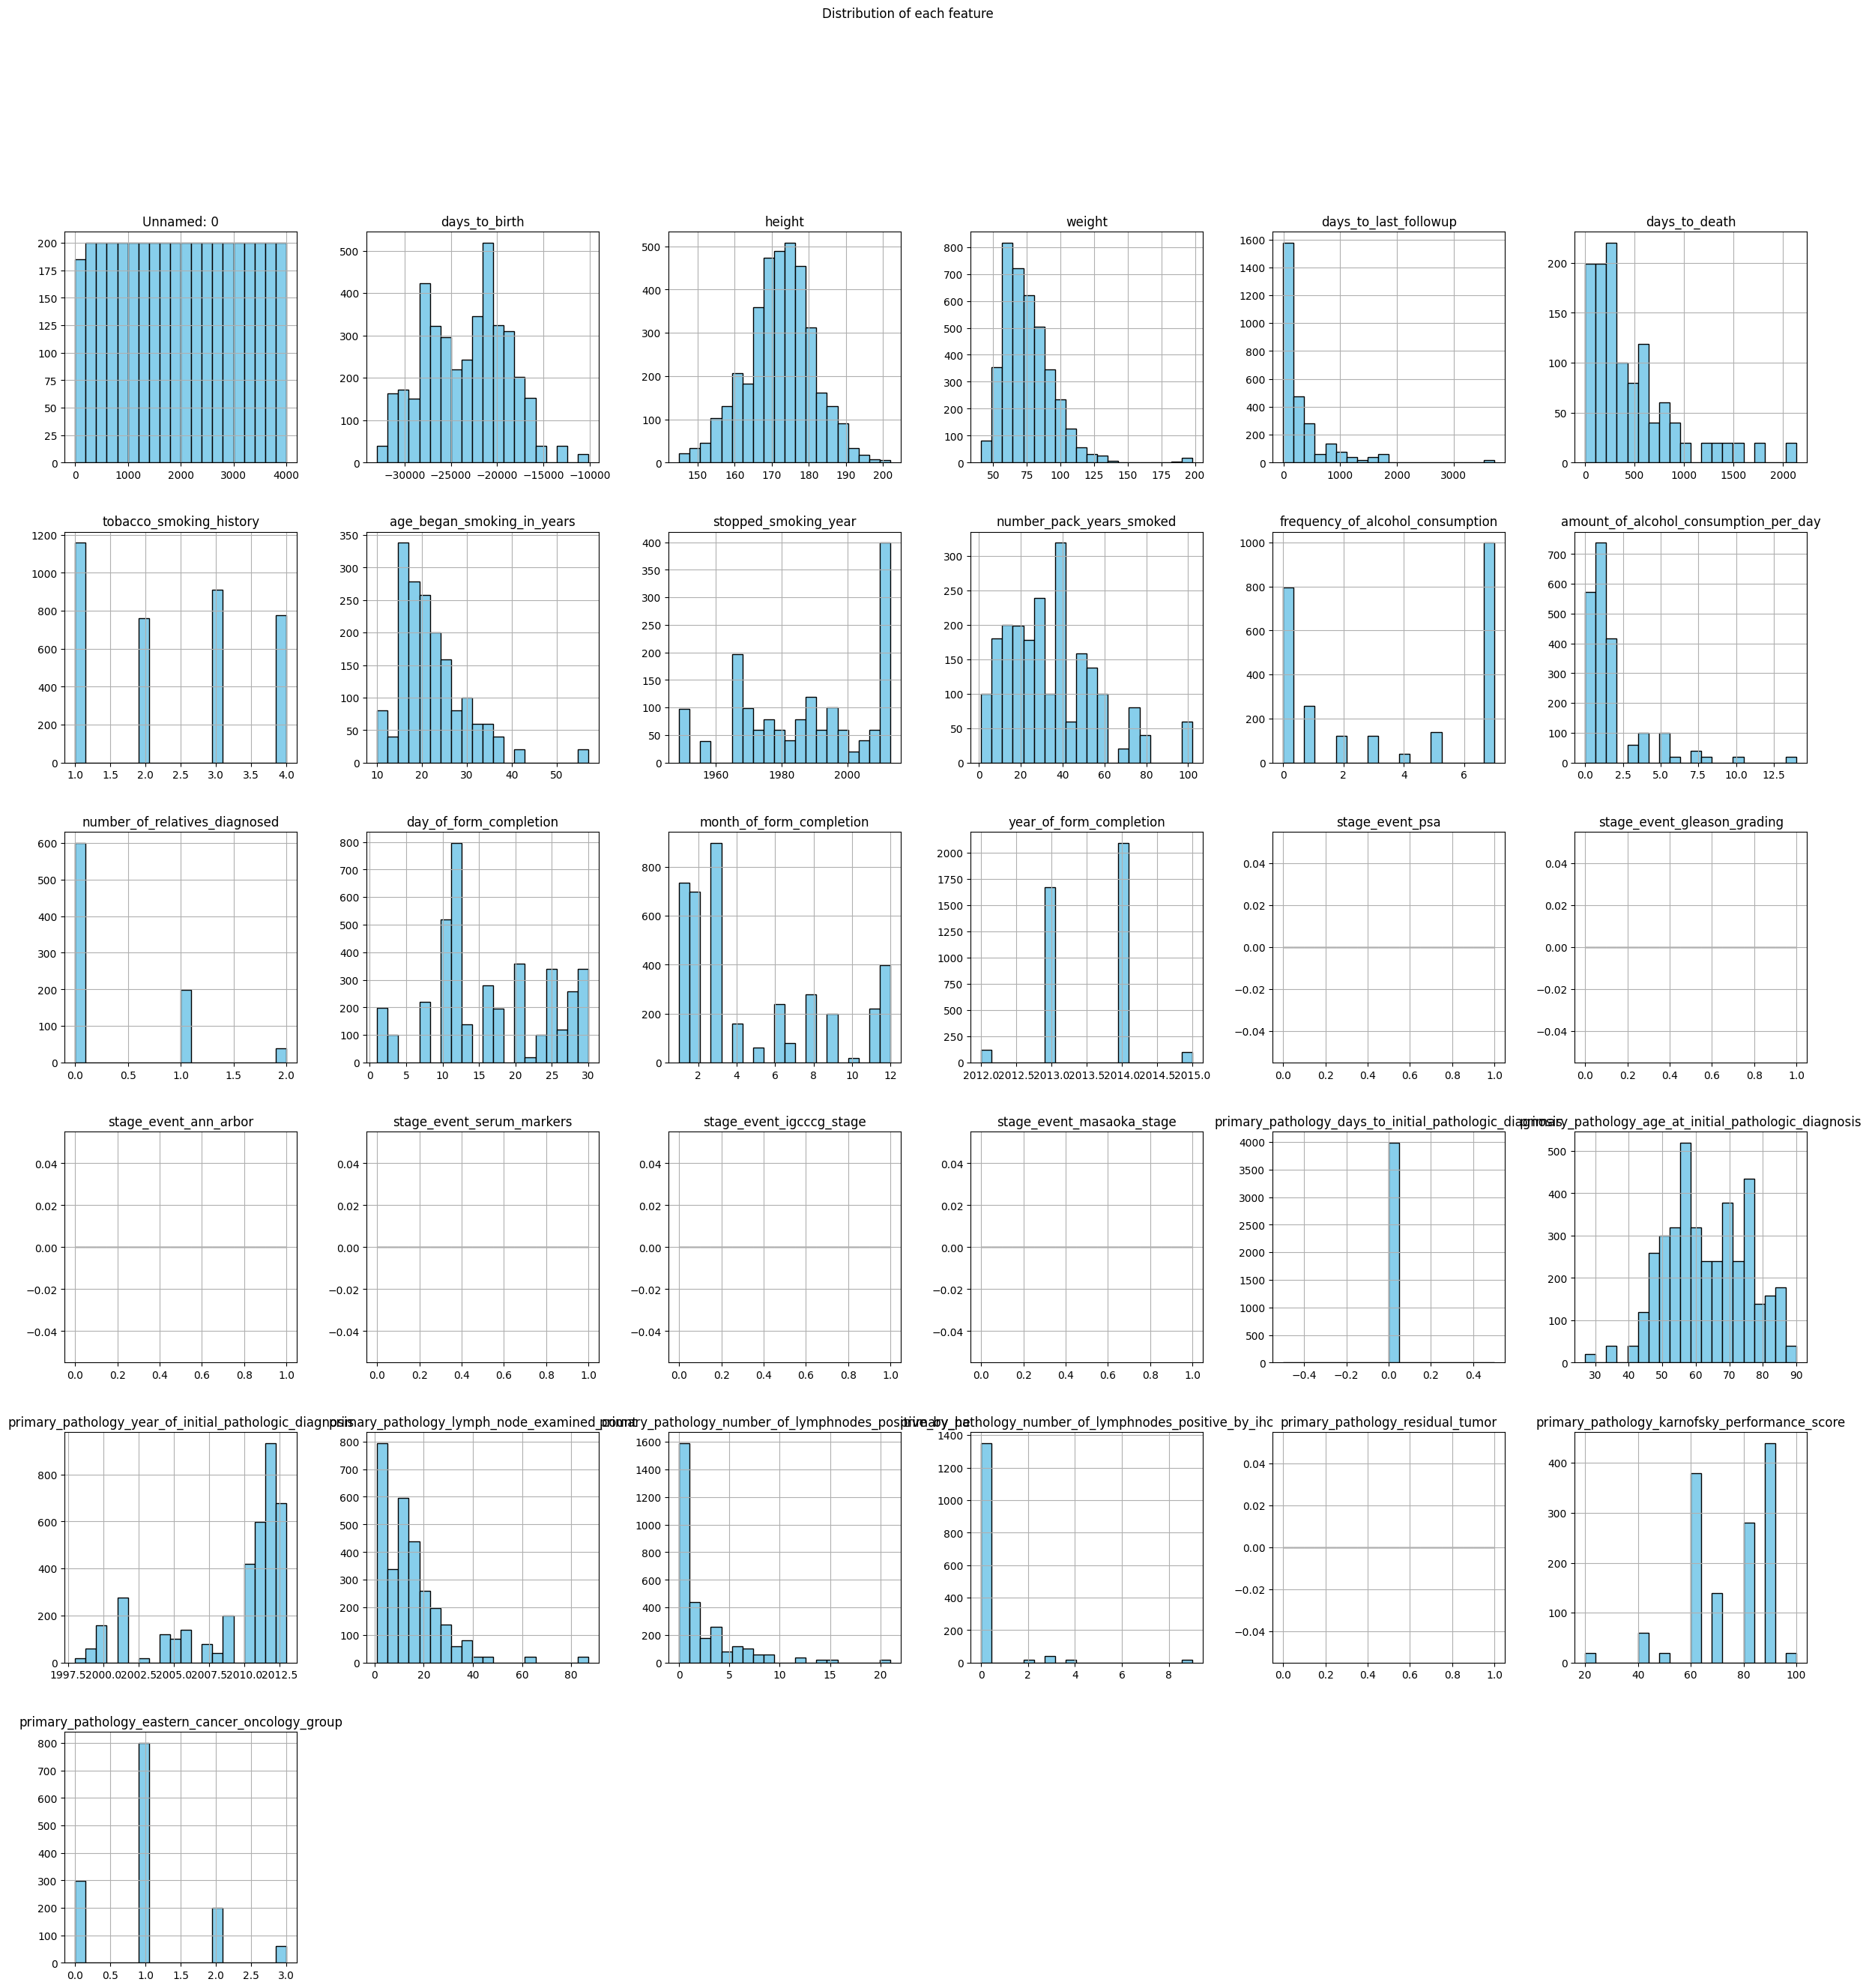

In [14]:
df.hist(bins=20, figsize=(30, 30), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of each feature')
plt.show()

##### Outliers Detection

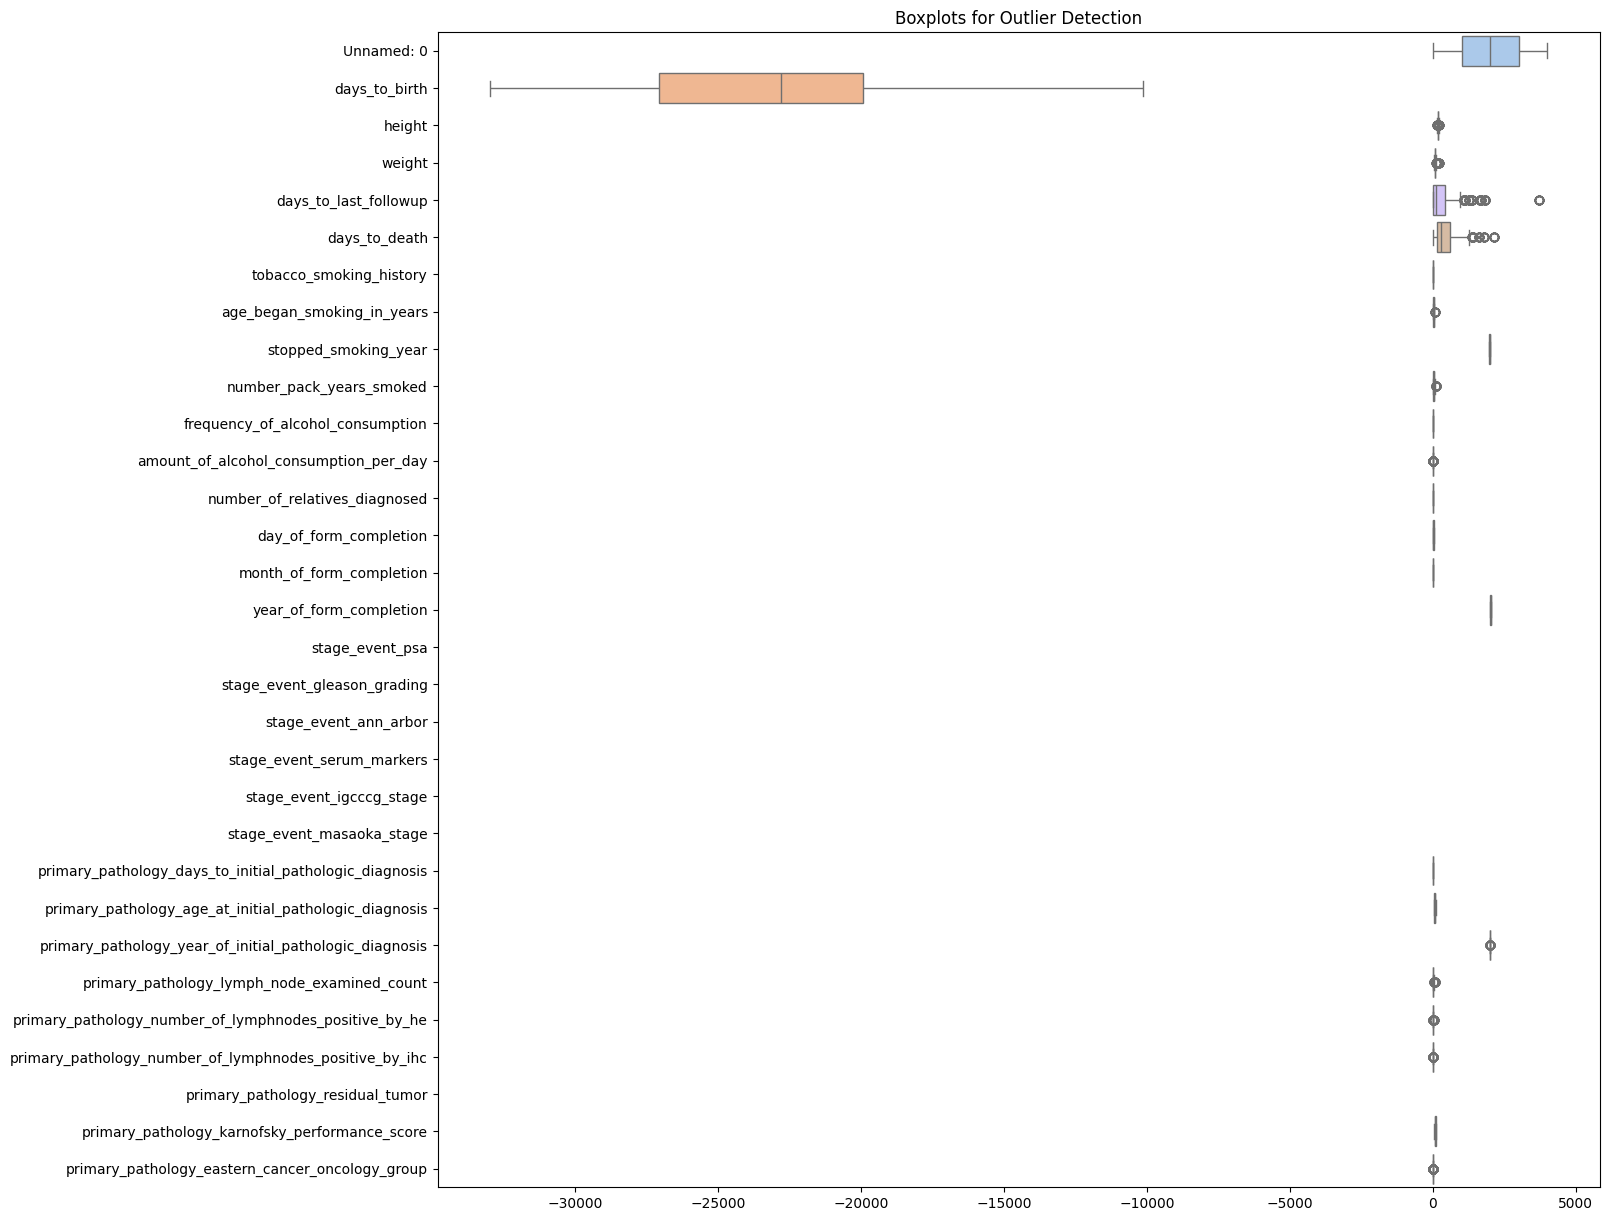

In [15]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, orient="h", palette="pastel")
plt.title("Boxplots for Outlier Detection")
plt.show()

#### Correlation matrix

We will now do a correlation matrix to find the most relevent variables to predict benign or malign. Focusing on diagnosis, correlations near 1 mean that the higher the value of the parameter, the more likely it is associated with malign. On the contrary, if it is near -1 it means that the higher the value of the parameter, the more likely it is associated with benign. Near 0 means that the parameter and diagnosis are most likely independant from each other.

In [16]:
corr_matrix = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'TCGA-2H-A9GF'

We delete the lines that have a too big correlation factor, because they have no additionnal value for our analysis.

In [14]:
df = df.drop(columns=['perimeter_worst', 'perimeter_worst'], axis=1)
df = df.drop(columns=['area_worst', 'area_worst'], axis=1)
df = df.drop(columns=['perimeter_mean', 'perimeter_mean'], axis=1)
df = df.drop(columns=['area_mean', 'area_mean'], axis=1)
df = df.drop(columns=['perimeter_se', 'perimeter_se'], axis=1)
df = df.drop(columns=['area_se', 'area_se'], axis=1)
df = df.drop(columns=['radius_worst', 'radius_worst'], axis=1)

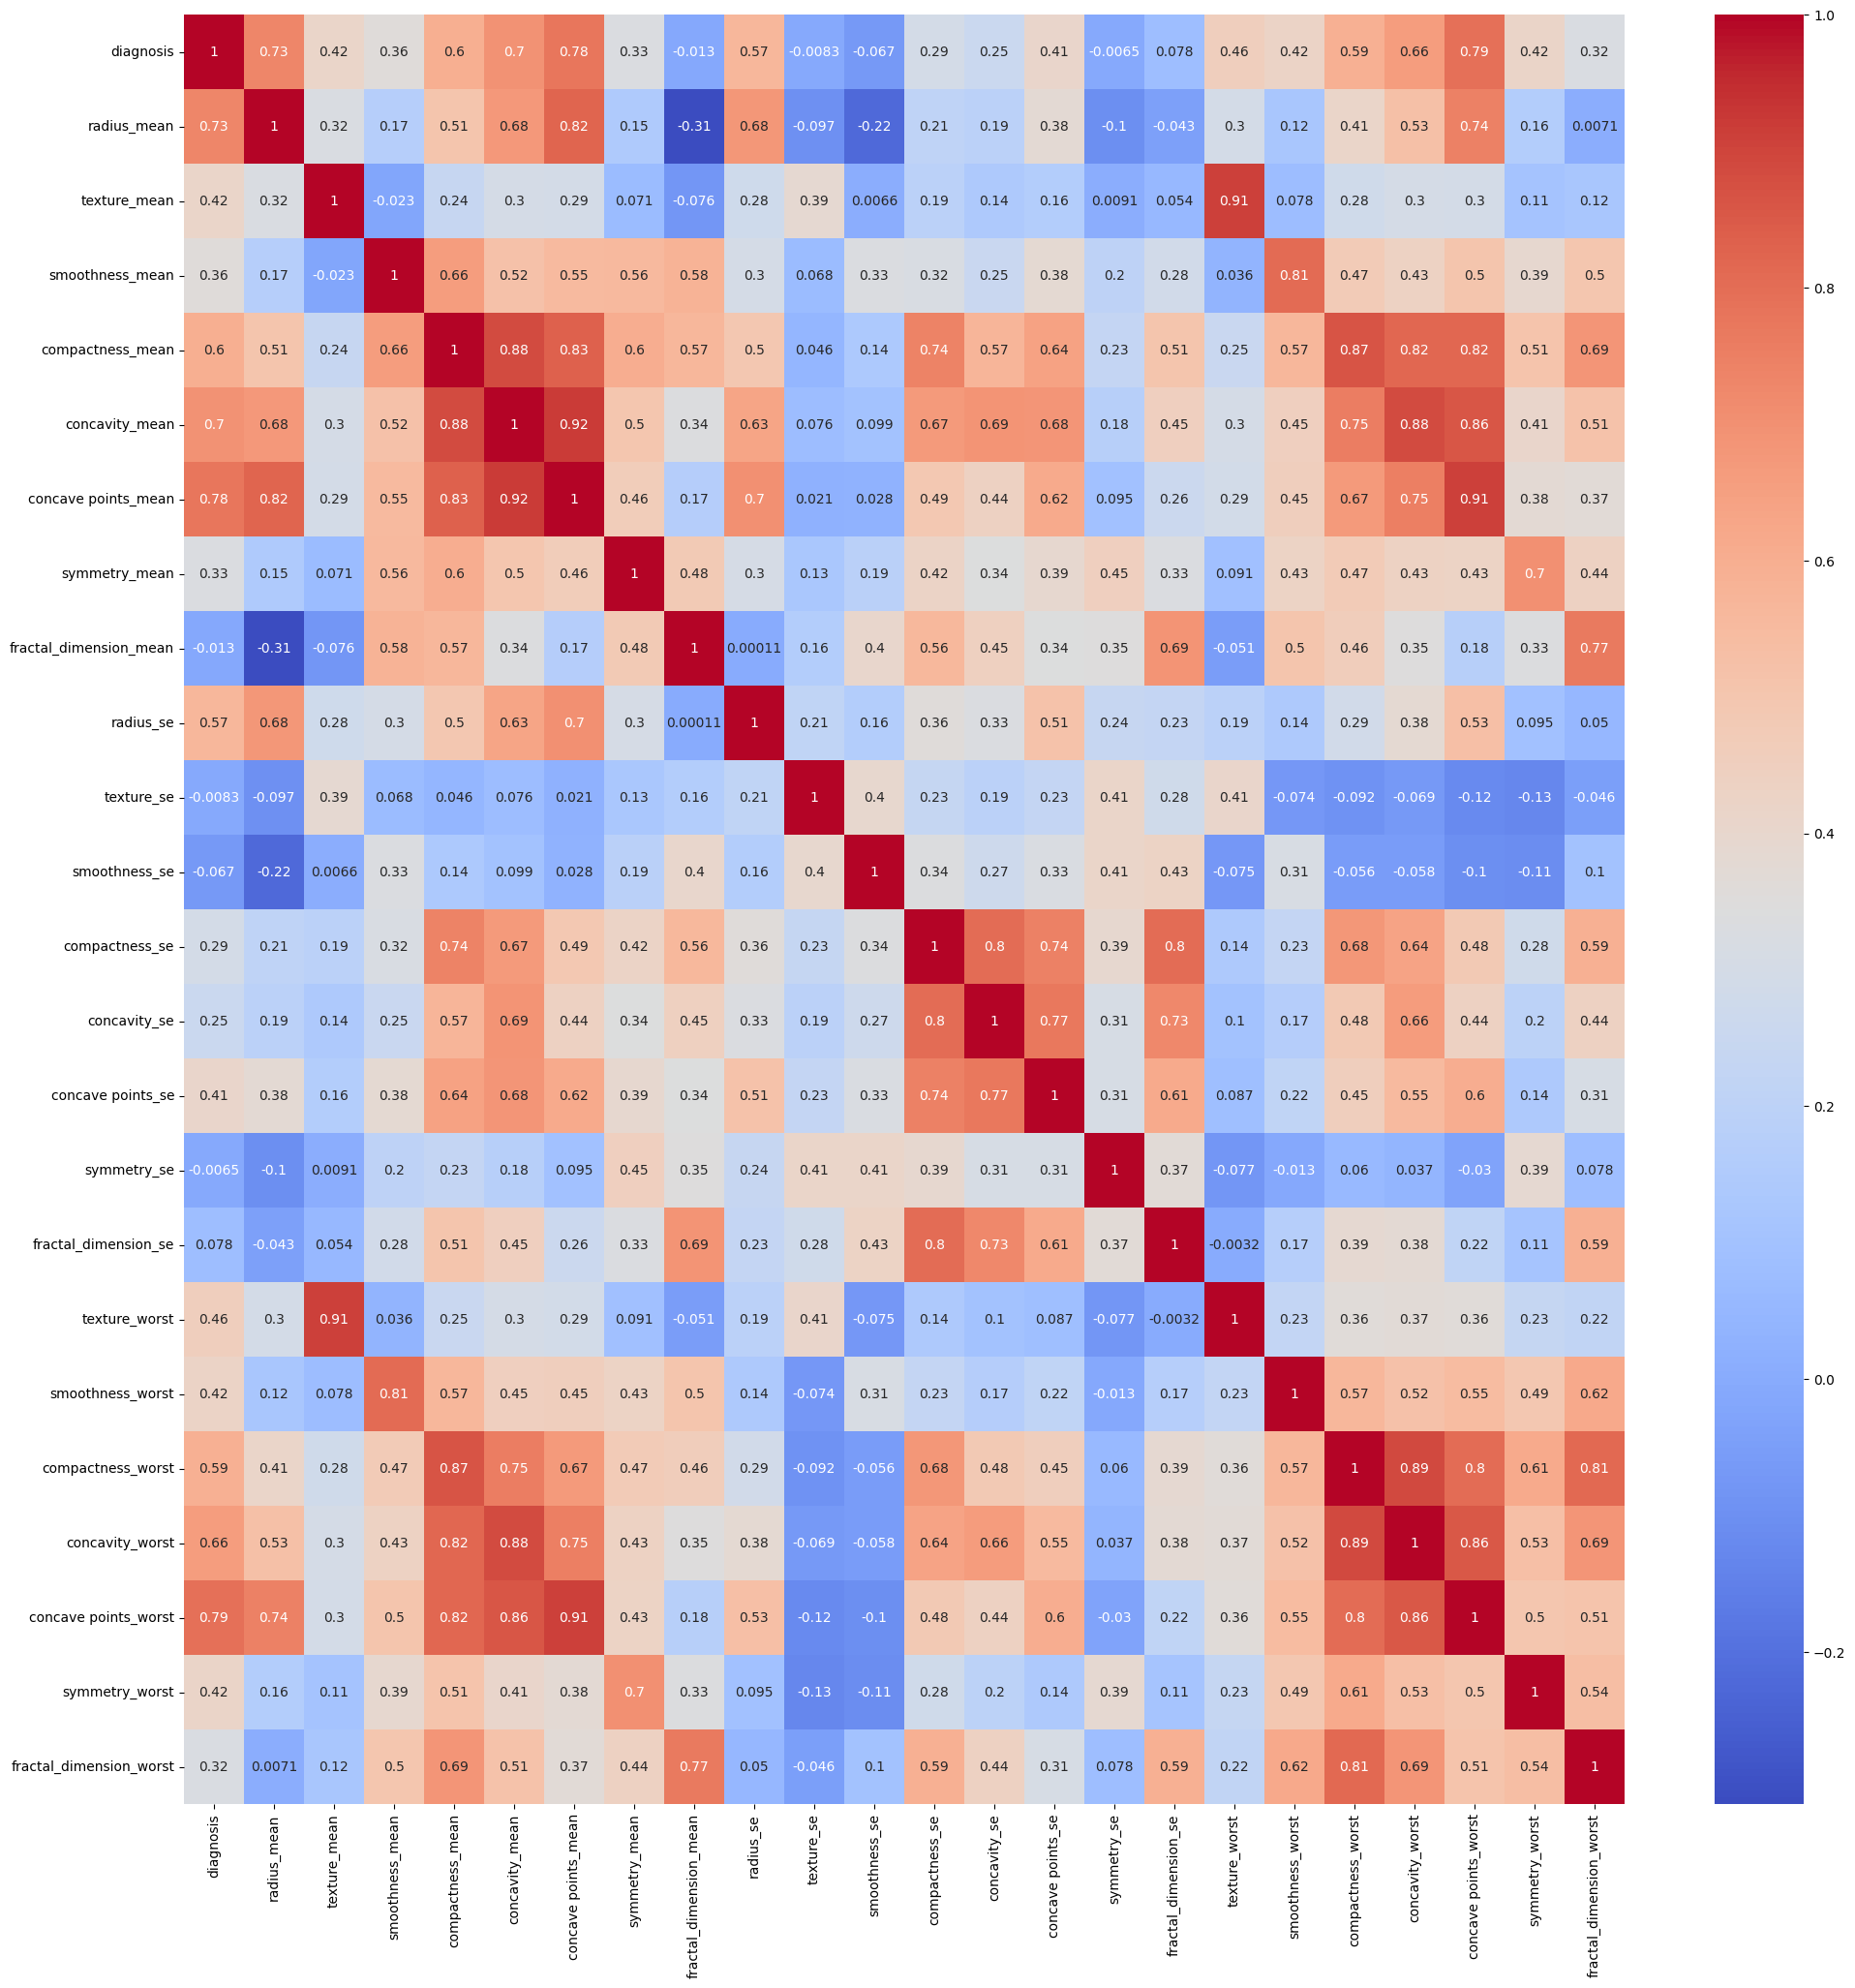

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(24,24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Predictions

#### Preprocessing

##### Standardization and Split

In [16]:
# Standardize the feature data
features = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Spliting features and target
X = features_scaled
y = df['diagnosis']

##### PCA

We want to find the number of component with explained variance at 95%

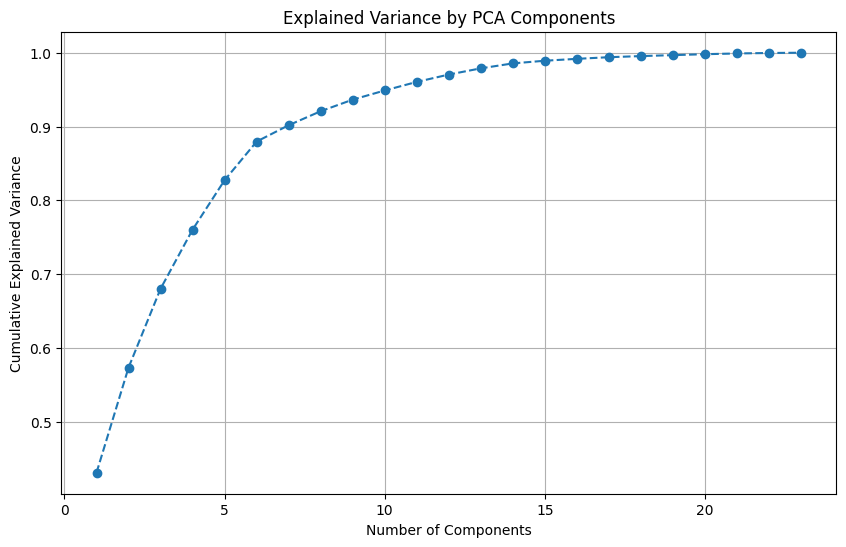

In [17]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [18]:
# Applying PCA
pca_5 = PCA(n_components=5)  # Adjust components as needed
X_pca_5 = pca_5.fit_transform(X)

#### Model Predictions

In [19]:
# Create a function so we can use it with and without PCA later on
def models_pred(X_chosen):
    """
    Fonction for prediction with Logistic Regression, SVM, Random Forest and KNN.
    Print the complete raport of the prediction along with the cross-validation for each model
    """
    X_train, X_test, y_train, y_test = train_test_split(X_chosen, y, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
        "Random Forest Classifier": RandomForestClassifier(random_state=42),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
    }

    # For Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\n===== {model_name} =====")
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Cross-validation
        scores = cross_val_score(model, X_chosen, y, cv=cv, scoring='accuracy')
        avg_accuracy = scores.mean()
        std_accuracy = scores.std()
        
        print("Accuracy:", accuracy)
        print("Confusion Matrix:\n", confusion)
        print("Classification Report:\n", report)
        print("Cross-Validation Accuracy: ", avg_accuracy, " ± ", std_accuracy)

##### Without PCA

In [20]:
X

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [21]:
models_pred(X)


===== Logistic Regression =====
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Cross-Validation Accuracy:  0.9736686849868033  ±  0.016627222216787987

===== Support Vector Machine (SVM) =====
Accuracy: 0.956140350877193
Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Cross-Validation A

##### With PCA (5 components)

In [22]:
X_pca_5

array([[ 7.86236766, -0.32426401, -2.66529321, -2.38981775,  1.43582775],
       [-0.32566187,  2.14882532, -0.08307315, -1.42098141, -0.05123587],
       [ 4.09945665,  1.9205475 , -0.11637797, -1.19182151,  0.8664185 ],
       ...,
       [ 0.20517372,  2.00528635,  1.93570731,  0.67229737, -1.8113839 ],
       [ 9.44492572,  2.05174016, -0.34168117,  1.98708347, -0.52462336],
       [-4.66979607, -0.3016497 ,  1.57019632,  2.04859333, -0.64127075]])

In [23]:
models_pred(X_pca_5)


===== Logistic Regression =====
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Cross-Validation Accuracy:  0.9613724576929048  ±  0.011843921143898482

===== Support Vector Machine (SVM) =====
Accuracy: 0.9385964912280702
Confusion Matrix:
 [[68  3]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Cross-Validation 

#### Analysis and conclusion of Step 1

We can see that all model performed quite well. But there still are some differences.  
We can make a first choice of models and explore our next possibilities (without PCA):  
- KNN did a bit more of missclassification than the others
- RF slightly underperform for malign class with a precision of .97 while a recall at .91
- LR and SVM results are similar with the best F1-scores for both classes while having also minimal overfitting but LR is slightly more effective.


With PCA:  
- Logistic Regression: Performance is consistent between the two sets with minor CV accuracy decrease.
- SVM: Performance drops slightly, with lower accuracy and classification metrics.
- Random Forest: Test accuracy and metrics decline, though CV accuracy is slightly higher (but less stable).
- KNN: Test accuracy and metrics remain unchanged, with negligible CV differences.

Logistic Regression seems to be the best model for now either with or without PCA.  
Overall, PCA provoked a decrease in all cross-validation while improving or keeping an accuracy quite high, which means it may have caused overfitting.  
It does not seem like a major proble here as the difference is quite small so we might keep the PCA next.


What we will try in Step 2:  
- Hyperparameters tuning for LR
- Boosting method with Gradient Boosting
- Stacking method with SVM and RF as base models and LR as meta model


## Stage 2

## Stage 3